# Vector Autoregression
adapted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(42)

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson

In [5]:
alaska = pd.read_csv(f'../data/alaska.csv')
alaska['week'] = pd.to_datetime(alaska['week'], format = '%Y-%m-%d')
alaska.head()

,state,week,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
0,Alaska,2017-12-31,28,46,24,37,0,0,0,0,0,0
1,Alaska,2018-01-07,37,45,25,65,37,0,0,0,0,0
2,Alaska,2018-01-14,10,46,16,53,30,0,0,0,0,0
3,Alaska,2018-01-21,33,41,10,35,14,0,0,0,0,0
4,Alaska,2018-01-28,32,24,0,40,0,0,0,0,0,0


In [40]:
alaska_f = alaska.copy()
alaska_f.set_index('week', inplace=True)
alaska_f = alaska_f[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']]
alaska_f.head()

,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2017-12-31,28,46,24,37,0
2018-01-07,37,45,25,65,37
2018-01-14,10,46,16,53,30
2018-01-21,33,41,10,35,14
2018-01-28,32,24,0,40,0


In [49]:
nobs = 20
df_train, df_test = alaska_f[0:-nobs], alaska_f[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)
df_test.head()

(242, 5)
(20, 5)


,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2022-08-21,31,43,30,25,30
2022-08-28,21,37,41,51,39
2022-09-04,8,46,18,74,29
2022-09-11,35,49,7,44,16
2022-09-18,40,48,39,13,33


In [50]:
df_train.tail()

,depression,anxiety,addiction,counselling,mental_health
week,,,,,
2022-07-17,16,47,22,32,18
2022-07-24,23,34,17,36,26
2022-07-31,34,59,13,15,45
2022-08-07,40,42,22,40,20
2022-08-14,28,44,13,28,37


In [42]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  26.194739182763065
BIC :  26.628531332160243
FPE :  237822548879.15417
HQIC:  26.369506005390992 

Lag Order = 2
AIC :  26.284828500495237
BIC :  27.082474920427778
FPE :  260312806060.5332
HQIC:  26.606221773251818 

Lag Order = 3
AIC :  26.34260843464658
BIC :  27.50627824282449
FPE :  275984691678.5427
HQIC:  26.811535333660096 

Lag Order = 4
AIC :  26.4636096404247
BIC :  27.995493761162116
FPE :  311888079248.69855
HQIC:  27.080986385408192 

Lag Order = 5
AIC :  26.542814313418308
BIC :  28.445125783239266
FPE :  338316401415.5462
HQIC:  27.309566290472723 

Lag Order = 6
AIC :  26.705686070592908
BIC :  28.980660349317354
FPE :  399436301893.5305
HQIC:  27.62274795710018 

Lag Order = 7
AIC :  26.853626541278345
BIC :  29.503521828707914
FPE :  465222502661.9988
HQIC:  27.92194243292663 

Lag Order = 8
AIC :  26.942679200060464
BIC :  29.969776758386654
FPE :  511670649205.149
HQIC:  28.163202740044692 

Lag Order = 9
AIC :  26.998774711886192
BIC :  30.405

C:\Users\ailin\anaconda3\envs\greykite\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [43]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,26.25*,26.32*,2.510e+11*,26.28*
1,26.28,26.73,2.602e+11,26.47
2,26.39,27.22,2.904e+11,26.73
3,26.46,27.65,3.094e+11,26.94
4,26.56,28.13,3.432e+11,27.19
5,26.64,28.59,3.737e+11,27.43
6,26.79,29.11,4.350e+11,27.73
7,26.93,29.62,5.001e+11,28.01
8,27.02,30.08,5.510e+11,28.25
9,27.06,30.50,5.799e+11,28.45


In [44]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 27, Jan, 2023
Time:                     20:53:38
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    26.6285
Nobs:                     241.000    HQIC:                   26.3695
Log likelihood:          -4836.29    FPE:                2.37823e+11
AIC:                      26.1947    Det(Omega_mle):     2.10307e+11
--------------------------------------------------------------------
Results for equation depression
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   28.188394         4.784983            5.891           0.000
L1.depression            0.117536         0.064852            1.812           0.070
L1.anxiety               0.063977         0

In [45]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

out = durbin_watson(model_fitted.resid)

for col, val in zip(alaska_f.columns, out):
    print(col, ':', round(val, 2))

depression : 2.04
anxiety : 2.03
addiction : 2.02
counselling : 2.01
mental_health : 2.02


'The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation.'
The values are close to 2 - no correlation

In [46]:
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_train.values[-4:]
forecast_input

1


array([[23, 34, 17, 36, 26],
       [34, 59, 13, 15, 45],
       [40, 42, 22, 40, 20],
       [28, 44, 13, 28, 37]], dtype=int64)

In [53]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_test.index[-nobs:], columns=df_train.columns + '_forecast')
df_forecast

,depression_forecast,anxiety_forecast,addiction_forecast,counselling_forecast,mental_health_forecast
week,,,,,
2022-08-21,33.977973,45.212066,14.704341,33.208914,28.911940
2022-08-28,35.351112,45.388616,14.139986,34.197907,29.747678
2022-09-04,35.650023,45.351529,14.306537,34.379255,29.992972
2022-09-11,35.670903,45.324186,14.341183,34.383729,30.037273
2022-09-18,35.666297,45.316961,14.347219,34.378600,30.037371
2022-09-25,35.664108,45.315812,14.347339,34.376897,30.035615
2022-10-02,35.663671,45.315748,14.347156,34.376615,30.035075
2022-10-09,35.663631,45.315772,14.347097,34.376599,30.034986
2022-10-16,35.663637,45.315781,14.347088,34.376606,30.034982


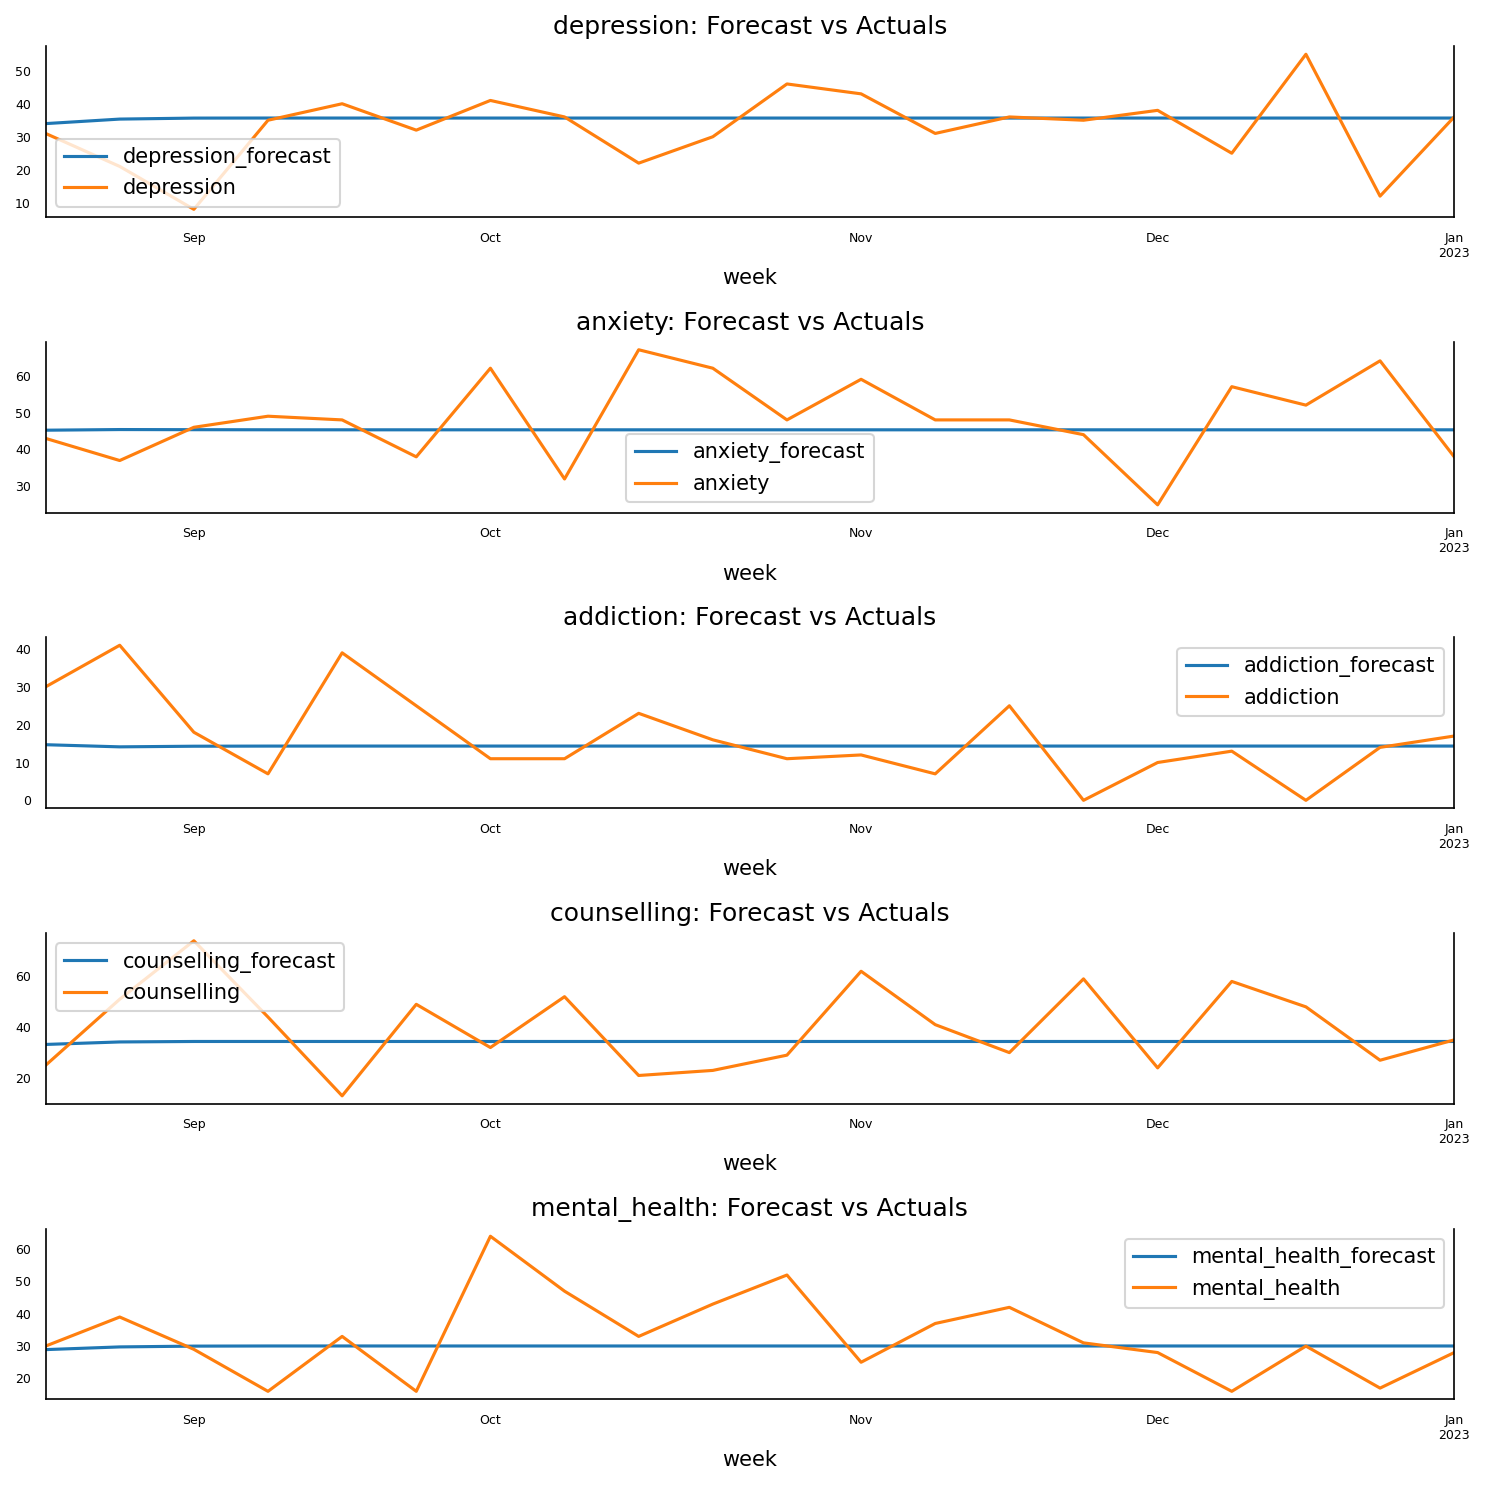

In [56]:
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(alaska_f.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();